Column Names: Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')
First few rows of the dataset:
    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   


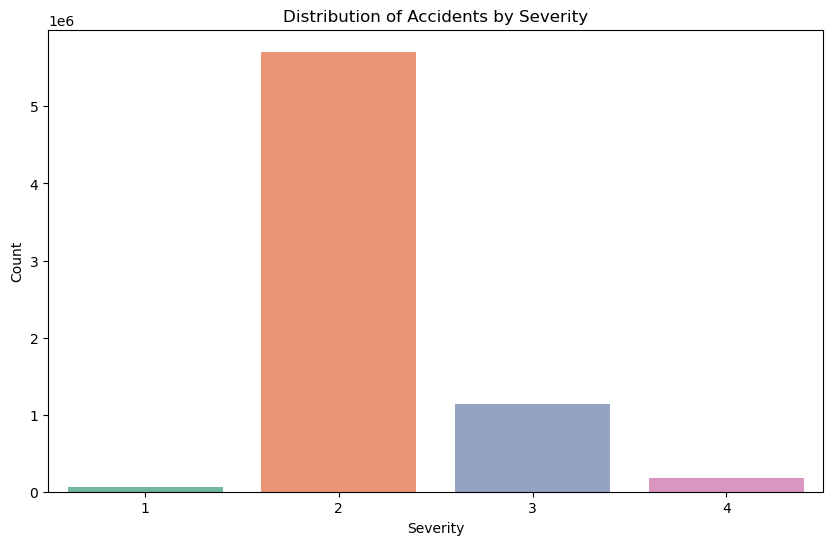

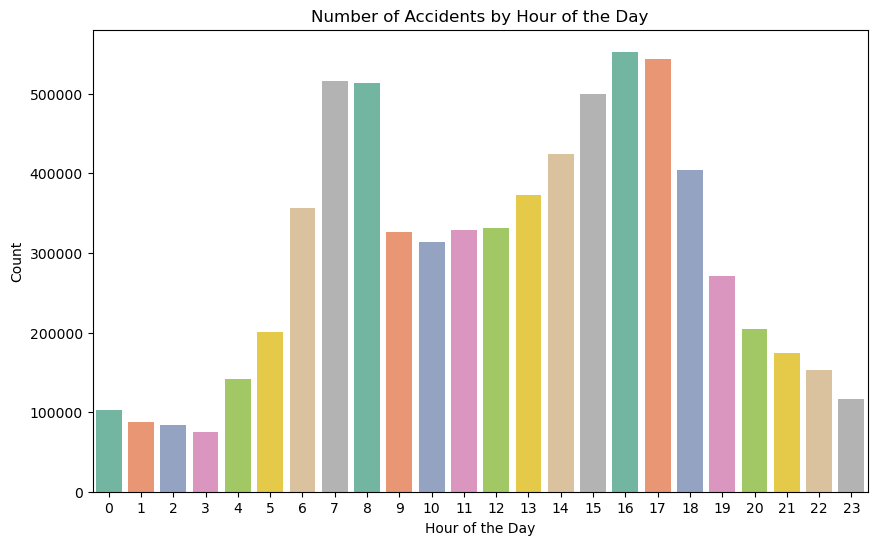

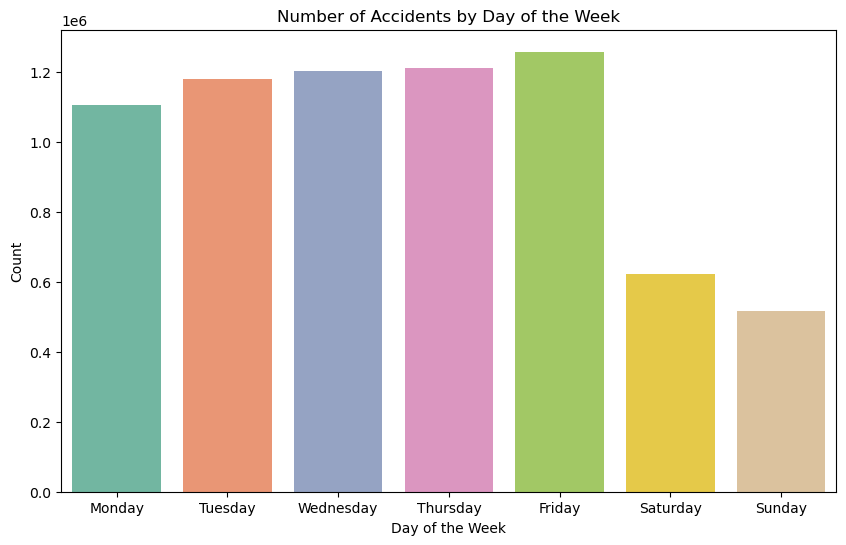

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

# Load the dataset
file_path = r"C:\Users\000GS6744\Downloads\US_Accidents_March23.csv.zip"
df = pd.read_csv(file_path)

# Display the column names and a few rows to understand the structure
print("Column Names:", df.columns)
print("First few rows of the dataset:")
print(df.head())

# Display the data types and memory usage
print(df.info())

# Identify columns with missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Drop rows with missing values in essential columns
df = df.dropna(subset=['Start_Time', 'End_Time', 'Severity', 'Weather_Condition', 'Temperature(F)', 'Visibility(mi)', 'Wind_Speed(mph)'])

# Convert date columns to datetime type
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='mixed', errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], format='mixed', errors='coerce')

# Strip any extra spaces from column names
df.columns = df.columns.str.strip()

# Create a new column for the duration of the accident
df['Duration'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds() / 3600  # Duration in hours

# Extract the hour from the Start_Time for time-based analysis
df['Hour'] = df['Start_Time'].dt.hour

# Extract the day of the week from the Start_Time
df['DayOfWeek'] = df['Start_Time'].dt.day_name()

# Visualization: Distribution of accidents by severity
plt.figure(figsize=(10, 6))
sns.countplot(x='Severity', data=df, palette='Set2')
plt.title('Distribution of Accidents by Severity')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.show()

# Visualization: Number of accidents by hour of the day
plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', data=df, palette='Set2')
plt.title('Number of Accidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.show()

# Visualization: Number of accidents by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(x='DayOfWeek', data=df, palette='Set2', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Number of Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()

# Visualization: Heatmap of accident locations
plt.figure(figsize=(10, 6))
map_data = df[['Start_Lat', 'Start_Lng']].dropna()
map_center = [map_data['Start_Lat'].mean(), map_data['Start_Lng'].mean()]
accident_map = folium.Map(location=map_center, zoom_start=5)

# Add heatmap layer
heat_data = [[row['Start_Lat'], row['Start_Lng']] for index, row in map_data.iterrows()]
HeatMap(heat_data).add_to(accident_map)

# Save the map to an HTML file and display
accident_map.save('accident_heatmap.html')
accident_map
